In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [71]:
data = pd.read_csv("mauna.csv")

In [72]:
data.columns

Index(['trainCO2', 'trainyear', 'testCO2', 'testyear'], dtype='object')

In [73]:
train = data[['trainCO2','trainyear']].values
test = data[['testCO2','testyear']].dropna().values

In [74]:
train

array([[ 315.71, 1958.2 ],
       [ 317.45, 1958.3 ],
       [ 317.5 , 1958.4 ],
       ...,
       [ 373.11, 2003.8 ],
       [ 374.67, 2003.9 ],
       [ 375.94, 2004.  ]])

In [75]:
y = train[:,0]
X = train[:,1].reshape(-1, 1)

test_y = test[:,0]
test_x = test[:,1].reshape(-1, 1)

# Center data
X = X - np.mean(X)
y = y - np.mean(y)

test_y = test_y - np.mean(test_y)
test_x = test_x - np.mean(test_x)

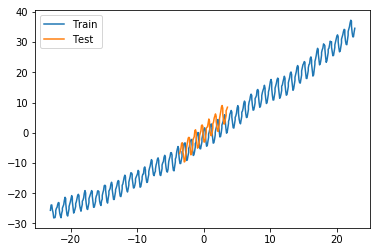

In [76]:
plt.plot(X,y, label="Train")
plt.plot(test_x,test_y, label="Test")
plt.legend()
plt.show()

In [77]:
x_range = np.arange(round(np.amin(X),1),round(np.amax(X),1) + 10.1, 0.1).reshape(-1, 1)

/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


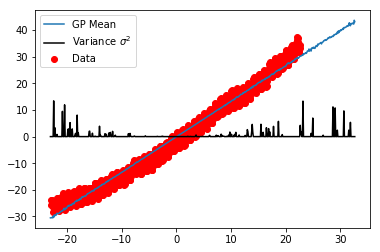

In [78]:
# Linear
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = DotProduct() # Defaults, no hyperparameters set
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [79]:
gp.log_marginal_likelihood()

-21568031882484.355

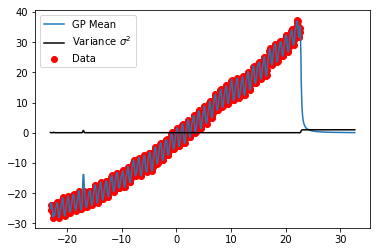

In [80]:
#RationalQuadratic
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = RationalQuadratic(length_scale=0.1) # Defaults, no hyperparameters set
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [81]:
gp.log_marginal_likelihood()

-368474214512.71814

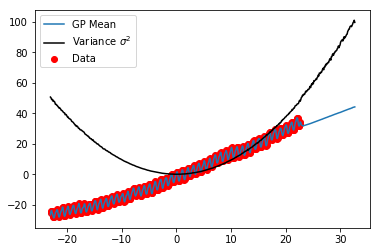

In [84]:
from sklearn.gaussian_process.kernels import RationalQuadratic

kernel = RationalQuadratic(length_scale=0.1) + DotProduct()
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [85]:
gp.log_marginal_likelihood()

-368496226016.75134

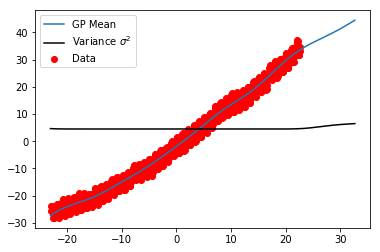

In [86]:
from sklearn.gaussian_process.kernels import WhiteKernel

kernel = RationalQuadratic(length_scale=0.1) + DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [87]:
gp.log_marginal_likelihood()

-1202.5681073954966

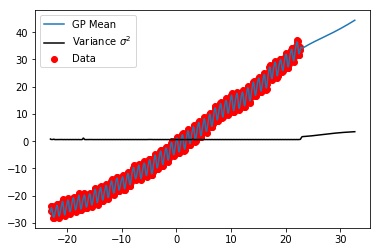

In [92]:
from sklearn.gaussian_process.kernels import RBF

kernel = RationalQuadratic(length_scale=0.1) + DotProduct() + WhiteKernel() + RBF()
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [93]:
gp.log_marginal_likelihood()

-1026.0246566738438

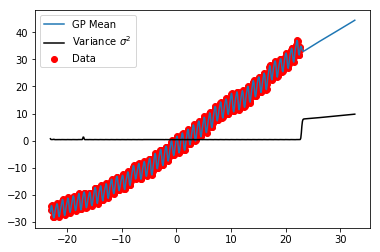

In [94]:
from sklearn.gaussian_process.kernels import RBF

kernel = RationalQuadratic(length_scale=0.1) + DotProduct() + WhiteKernel() + 1.1*RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [95]:
gp.log_marginal_likelihood()

-826.8538543231928

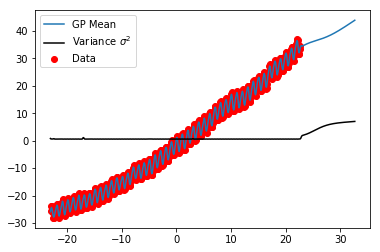

In [96]:
from sklearn.gaussian_process.kernels import RBF

kernel = RationalQuadratic(length_scale=0.1) + DotProduct() + WhiteKernel() + 1.1*RBF(length_scale=10, length_scale_bounds=(1e-3, 3.0))
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(X,y, label="Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [97]:
gp.log_marginal_likelihood()

-1022.6614199172217

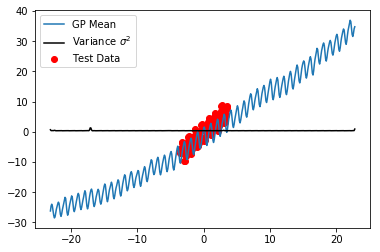

In [108]:
x_range = np.arange(round(np.amin(X),1),round(np.amax(X),1) + 0.1, 0.1).reshape(-1, 1)

kernel = RationalQuadratic(length_scale=0.1) + DotProduct() + WhiteKernel() + 1.1*RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X,y)

y_pred, std = gp.predict(x_range, return_std=True)
var = std*std

plt.clf()
plt.scatter(test_x,test_y, label="Test Data", c='r')
plt.plot(x_range,y_pred, label="GP Mean")

plt.plot(x_range,var, c='k',label="Variance $\sigma^2$")

plt.legend()
plt.show()

In [107]:
gp.log_marginal_likelihood()

-826.8538543231928

The best model (RationalQuadradic, length scale = 0.1; DotProduct; WhiteKernel; and RBF) has log-marginal likelihood = $-826.85$ and is depicted above. As one can see, the model tracks both the trend and seasonality in the data, and there are no big fluctuations in variance between $m$ and $M$. 

This, to me, is the best model since it has the greatest log-marginal likelihood, and it captures the important elements of time-series data: trend (with the linear kernel), seasonality (RationalQuad, RBF), and noise (WhiteKernel).